In [2]:
#pip install PEPit

# Readme

This notebook exemplifies the results of [1, Section 3.2] (and in particular those of [1, Proposition 6]) for the numerical analysis of gradient descent).

> [1] Rubbens, Anne, and Taylor, Adrien B. "One-point extensions of function and operator classes."

The code requires the installation of the [PEPit](https://pepit.readthedocs.io/en/latest/) package, e.g., by uncommenting the pip install command above.

# Function class: refined characterization of convex functions that are smooth and satisfy a Lojasiewicz condition

In [2]:
import numpy as np
from PEPit import PEP
from PEPit.function import Function

In [3]:
class ImprovedLojasiewiczSmoothConvexFunction(Function):
    def __init__(self,
                 L,
                 mu,
                 alpha,
                 is_leaf=True,
                 decomposition_dict=None,
                 reuse_gradient=True,
                 name=None):
        
        super().__init__(is_leaf=is_leaf,
                         decomposition_dict=decomposition_dict,
                         reuse_gradient=True,
                         name=name,
                         )
        assert L >= 0
        assert mu >= 0
        assert L >= mu
        
        self.mu = mu
        self.L = L
        self.alpha = alpha
        
    def set_LojaSimple(self,
                       xi, gi, fi,
                       xj, gj, fj,
                      ):
        
        constraint = (fi - fj <= gi**2 / 2 / self.mu)

        return constraint
        
    def set_LowerSimple(self,
                        xi, gi, fi,
                        xj, gj, fj,
                       ):
        
        constraint = (fi - fj >= gi**2 / 2 / self.L)

        return constraint
        
    def set_ImprovedSmoothness(self,
                             xi, gi, fi,
                             xj, gj, fj,
                            ):
        const = (self.L+self.mu)*(1-self.alpha)**2 / ((self.L+self.mu)*(1-self.alpha)**2-(self.L-self.mu))

        constraint = (fi - fj >= 1/4 * (gi + gj) * (xi - xj) + 1 / (4 * self.L) * (gj - gi) ** 2 - self.L/4 * (xj - xi)**2
                      + self.alpha / ( 1 - self.alpha ) * ( (fj + gj**2 / 2/self.L) - self.L/4 * const * (xj - xi + (gi+gj)/self.L)**2 ) )

        return constraint
        
    def set_SmoothnessSimple(self,
                             xi, gi, fi,
                             xj, gj, fj,
                            ):
        constraint = (fi - fj >= 1/4 * (gi + gj) * (xi - xj) + 1 / (4 * self.L) * (gj - gi) ** 2 - self.L/4 * (xj - xi)**2 )

        return constraint
    
    def add_class_constraints(self):
        if self.list_of_stationary_points == list():
            self.stationary_point()

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_stationary_points,
                                                      constraint_name="basic_Lojasiewicz",
                                                      set_class_constraint_i_j=self.set_LojaSimple,
                                                      )

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_stationary_points,
                                                      constraint_name="lower_bound",
                                                      set_class_constraint_i_j=self.set_LowerSimple,
                                                      )

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_points,
                                                      constraint_name="smoothness",
                                                      set_class_constraint_i_j=self.set_SmoothnessSimple,
                                                      )

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_points,
                                                      constraint_name="smoothness",
                                                      set_class_constraint_i_j=self.set_ImprovedSmoothness,
                                                      )


In [4]:

class NaiveLojasiewiczSmoothConvexFunction(Function):
    def __init__(self,
                 L,
                 mu,
                 is_leaf=True,
                 decomposition_dict=None,
                 reuse_gradient=True,
                 name=None):
        
        super().__init__(is_leaf=is_leaf,
                         decomposition_dict=decomposition_dict,
                         reuse_gradient=True,
                         name=name,
                         )
        assert L >= 0
        assert mu >= 0
        assert L >= mu
        
        self.mu = mu
        self.L = L
        
    def set_LojaSimple(self,
                       xi, gi, fi,
                       xj, gj, fj,
                      ):
        
        constraint = (fi - fj <= gi**2 / 2 / self.mu)

        return constraint
    
    def set_LowerSimple(self,
                        xi, gi, fi,
                        xj, gj, fj,
                       ):
        
        
        constraint = (fi - fj >= 0)

        return constraint
    
    def set_SmoothnessSimple(self,
                             xi, gi, fi,
                             xj, gj, fj,
                            ):
        
        constraint = (fi - fj >= 1/4 * (gi + gj) * (xi - xj) + 1 / (4 * self.L) * (gj - gi) ** 2 - self.L/4 * (xj - xi)**2 )

        return constraint
    
    def add_class_constraints(self):
        if self.list_of_stationary_points == list():
            self.stationary_point()

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_stationary_points,
                                                      constraint_name="basic_Lojasiewicz",
                                                      set_class_constraint_i_j=self.set_LojaSimple,
                                                      )

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_stationary_points,
                                                      constraint_name="lower_bound",
                                                      set_class_constraint_i_j=self.set_LowerSimple,
                                                      )

        self.add_constraints_from_two_lists_of_points(list_of_points_1=self.list_of_points,
                                                      list_of_points_2=self.list_of_points,
                                                      constraint_name="smoothness",
                                                      set_class_constraint_i_j=self.set_SmoothnessSimple,
                                                      )


## Example: gradient descent

In this example, we aim to quantify $\rho$ (the smaller the better) such that the inequality

$$ \min_{0\leq i\leq n}\|\nabla f(x_{i})\|^2 \leq \tau(L,\mu,n,\gamma) \|x_0-x_\star\|^2 $$

is valid for all $f$ that is $L$-smooth and satisfy a $\mu$-Lojasiewicz property, and for all $x_k,x_{k+1}$ such that $x_{k+1}=x_k-\gamma \nabla f(x_k)$.

In [5]:
from PEPit import PEP
from PEPit.functions import SmoothConvexFunction

def wc_gradient_descent_NaiveLojaciewicz(L, mu, gamma, n, wrapper="cvxpy", solver=None, verbose=1):
    # Instantiate PEP
    problem = PEP()

    # Declare a smooth convex function
    func = problem.declare_function(NaiveLojasiewiczSmoothConvexFunction, L=L, mu=mu)

    # Start by defining its unique optimal point xs = x_* and corresponding function value fs = f_*
    xs = func.stationary_point()
    fs = func(xs)

    # Then define the starting point x0 of the algorithm
    x0 = problem.set_initial_point()
    g = func.gradient(x0)

    # Set the initial constraint that is the distance between x0 and x^*
    problem.set_initial_condition( (x0-xs)**2 <= 1)
    x = x0
    problem.set_performance_metric( g**2 )
    for i in range(n):
        x = x - gamma * g
        g = func.gradient(x)
        problem.set_performance_metric( g**2 )
        
    # Solve the PEP
    pepit_verbose = max(verbose, 0)
    pepit_tau = problem.solve(wrapper=wrapper, solver=solver, verbose=pepit_verbose)


    # Return the worst-case guarantee of the evaluated method (and the reference theoretical value)
    return pepit_tau

def wc_gradient_descent_ImprovedLojaciewicz(L, mu, gamma, alpha, n, wrapper="cvxpy", solver=None, verbose=1):
    # Instantiate PEP
    problem = PEP()

    # Declare a smooth convex function
    func = problem.declare_function(ImprovedLojasiewiczSmoothConvexFunction, L=L, mu=mu, alpha=alpha)

    # Start by defining its unique optimal point xs = x_* and corresponding function value fs = f_*
    xs = func.stationary_point()
    fs = func(xs)

    # Then define the starting point x0 of the algorithm
    x0 = problem.set_initial_point()
    g = func.gradient(x0)

    # Set the initial constraint that is the distance between x0 and x^*
    problem.set_initial_condition( (x0-xs)**2 <= 1)
    x = x0
    problem.set_performance_metric( g**2 )
    for i in range(n):
        x = x - gamma * g
        g = func.gradient(x)
        problem.set_performance_metric( g**2 )

    # Solve the PEP
    pepit_verbose = max(verbose, 0)
    pepit_tau = problem.solve(wrapper=wrapper, solver=solver, verbose=pepit_verbose)


    # Return the worst-case guarantee of the evaluated method (and the reference theoretical value)
    return pepit_tau

In [6]:
L, mu, gamma, n = 1, .1, 1, 2
alpha = (mu/2/(L+mu))
verbose = 0

pepit_tau_naive = wc_gradient_descent_NaiveLojaciewicz(L, mu, gamma, n, verbose=verbose)
pepit_tau_improved = wc_gradient_descent_ImprovedLojaciewicz(L, mu, gamma, alpha, n, verbose=verbose)

print('*** Gradient descent *** ')
print('\tPEPit guarantee (std inequalities):\t min_(0<=i<=n) ||nabla f(x_(i))||^2_2 <= {:.6} ||x0-x*||^2_2'.format(pepit_tau_naive))
print('\tPEPit guarantee (refined inequalities):\t min_(0<=i<=n) ||nabla f(x_(i))||^2_2 <= {:.6}  ||x0-x*||^2_2'.format(pepit_tau_improved))
print('\tIs the refined inequality stronger? {}'.format(pepit_tau_improved<=pepit_tau_naive))

*** Gradient descent *** 
	PEPit guarantee (std inequalities):	 min_(0<=i<=n) ||nabla f(x_(i))||^2_2 <= 0.443727 ||x0-x*||^2_2
	PEPit guarantee (refined inequalities):	 min_(0<=i<=n) ||nabla f(x_(i))||^2_2 <= 0.238939  ||x0-x*||^2_2
	Is the refined inequality stronger? True


### Experiments for a few numbers of iterations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

n_list = np.array([1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25, 30, 35, 40, 50])

L, mu, gamma = 1, .1, 1
alpha = (mu/2/(L+mu))
verbose = 0

GD_Loja_Naive = list()
GD_Loja_Improved = list()

for n in n_list:
    t0= time.process_time()
    pepit_tau_naive = wc_gradient_descent_NaiveLojaciewicz(L, mu, gamma, n, verbose=verbose)
    GD_Loja_Naive.append(pepit_tau_naive)
    pepit_tau_improved = wc_gradient_descent_ImprovedLojaciewicz(L, mu, gamma, alpha, n, verbose=verbose)
    GD_Loja_Improved.append(pepit_tau_improved)
    t1 = time.process_time() - t0
    print('n=',n,' done [elapsed time:',"%.2f" %t1,'[s]')
    


n= 1  done [elapsed time: 0.07 [s]
n= 2  done [elapsed time: 0.09 [s]
n= 3  done [elapsed time: 0.11 [s]
n= 4  done [elapsed time: 0.14 [s]
n= 5  done [elapsed time: 0.16 [s]
n= 6  done [elapsed time: 0.20 [s]
n= 7  done [elapsed time: 0.25 [s]
n= 8  done [elapsed time: 0.37 [s]
n= 10  done [elapsed time: 0.82 [s]
n= 15  done [elapsed time: 1.16 [s]


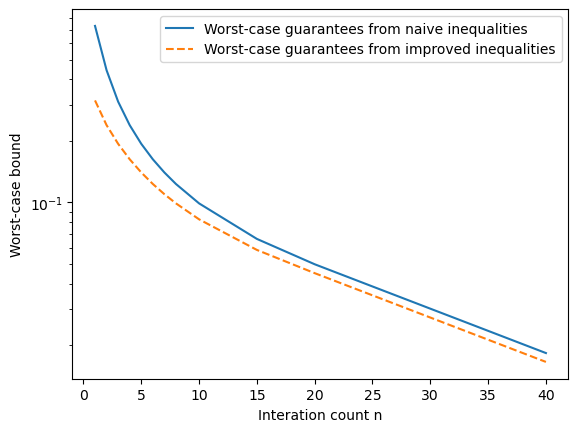

In [14]:
# Plots
plt.plot(n_list, GD_Loja_Naive, '-', label='Worst-case guarantees from naive inequalities')
plt.plot(n_list, GD_Loja_Improved, '--', label='Worst-case guarantees from improved inequalities')

plt.legend()
plt.xlabel('Interation count n')
plt.ylabel('Worst-case bound')
plt.semilogy()

plt.show()